In [5]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bryon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bryon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
from datasets import load_dataset
import pandas as pd

# Load the dataset from the Hugging Face library
dataset = load_dataset('SetFit/enron_spam')

# Convert the dataset to a DataFrame
df = pd.DataFrame(dataset['train'])

# Display the DataFrame
print(df.head())


C:\Users\Bryon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Repo card metadata block was not found. Setting CardData to empty.


   message_id                                               text  label  \
0       33214  any software just for 15 $ - 99 $ understandin...      1   
1       11929  perspective on ferc regulatory action client c...      0   
2       19784  wanted to try ci 4 lis but thought it was way ...      1   
3        2209  enron / hpl actuals for december 11 , 2000 tec...      0   
4       15880  looking for cheap high - quality software ? ro...      1   

  label_text                                            subject  \
0       spam                  any software just for 15 $ - 99 $   
1        ham  perspective on ferc regulatory action client c...   
2       spam  wanted to try ci 4 lis but thought it was way ...   
3        ham         enron / hpl actuals for december 11 , 2000   
4       spam  looking for cheap high - quality software ? ro...   

                                             message       date  
0  understanding oem software\nlead me not into t... 2005-06-18  
1  19 th , 2 :

In [7]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#FC0")]}
])
styled_df

,message_id,text,label,label_text,subject,message,date
0,33214,any software just for 15 $ - 99 $ understanding oem software lead me not into temptation ; i can find the way myself . # 3533 . the law disregards trifles .,1,spam,any software just for 15 $ - 99 $,understanding oem software lead me not into temptation ; i can find the way myself . # 3533 . the law disregards trifles .,2005-06-18 00:00:00
1,11929,"perspective on ferc regulatory action client conf call today , jun e 19 th , 2 : 00 pm edt perspective on ferc regulatory action client conference call today , tuesday , june 19 th 2 : 00 pm edt host : ray niles , power / natural gas analyst speaker : steve bergstrom , president & coo of dynegy steve bergstrom , president and chief operating officer of dynegy , will join us at 2 : 00 p . m . today for a conference call discussion of the recent ferc action imposing price controls in the west . the discussion will be followed by q & a . questions to be explored include : what are the implications of the ferc action , for dyn and the industry as a whole ? what is the earnings impact ? what are the risks of further re - regulation ? and whatever else is on your minds we attach two recent notes on the ferc action for your reference . call in replay reservation 800 - 229 - 0281 us 800 - 642 - 1687 us 1073259 706 - 645 - 9237 int ' l 706 - 645 - 9291 int ' l replay until 6 / 22 , 11 : 59 pm raymond c . niles power / natural gas research salomon smith barney ( 212 ) 816 - 2807 ray . niles @ ssmb . com s",0,ham,"perspective on ferc regulatory action client conf call today , jun e","19 th , 2 : 00 pm edt perspective on ferc regulatory action client conference call today , tuesday , june 19 th 2 : 00 pm edt host : ray niles , power / natural gas analyst speaker : steve bergstrom , president & coo of dynegy steve bergstrom , president and chief operating officer of dynegy , will join us at 2 : 00 p . m . today for a conference call discussion of the recent ferc action imposing price controls in the west . the discussion will be followed by q & a . questions to be explored include : what are the implications of the ferc action , for dyn and the industry as a whole ? what is the earnings impact ? what are the risks of further re - regulation ? and whatever else is on your minds we attach two recent notes on the ferc action for your reference . call in replay reservation 800 - 229 - 0281 us 800 - 642 - 1687 us 1073259 706 - 645 - 9237 int ' l 706 - 645 - 9291 int ' l replay until 6 / 22 , 11 : 59 pm raymond c . niles power / natural gas research salomon smith barney ( 212 ) 816 - 2807 ray . niles @ ssmb . com s",2001-06-19 00:00:00
2,19784,wanted to try ci 4 lis but thought it was way too expensive for you ? viagra at $ 1 . 12 per dose ready to boost your sex life ? positive ? time to do it right now . order viagra at incredibly low prices $ 1 . 12 per dose . unbelivable remove,1,spam,wanted to try ci 4 lis but thought it was way too expensive for you ?,viagra at $ 1 . 12 per dose ready to boost your sex life ? positive ? time to do it right now . order viagra at incredibly low prices $ 1 . 12 per dose . unbelivable remove,2004-09-11 00:00:00
3,2209,"enron / hpl actuals for december 11 , 2000 teco tap 30 . 000 / enron ; 120 . 000 / hpl gas daily ls hpl lsk ic 30 . 000 / enron",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl gas daily ls hpl lsk ic 30 . 000 / enron,2000-12-12 00:00:00
4,15880,"looking for cheap high - quality software ? rotated napoleonizes water past also , burn , course . gave country , mass lot . act north good . from , learn form most brother vary . when more for . up stick , century put , song be . test , describe , plain , against wood star . began dress ever group . here oh , most world stay .",1,spam,looking for cheap high - quality software ? rotated napoleonizes,"water past also , burn , course . gave country , mass lot . act north good . from , learn form most bro

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   message_id  31716 non-null  int64         
 1   text        31716 non-null  object        
 2   label       31716 non-null  int64         
 3   label_text  31716 non-null  object        
 4   subject     31716 non-null  object        
 5   message     31716 non-null  object        
 6   date        31716 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.7+ MB


In [9]:
df.drop(columns = ['message_id', 'date'], inplace = True)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['label'])

In [11]:
styled_df = df.head().style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,text,label,label_text,subject,message,target
0,any software just for 15 $ - 99 $ understanding oem software lead me not into temptation ; i can find the way myself . # 3533 . the law disregards trifles .,1,spam,any software just for 15 $ - 99 $,understanding oem software lead me not into temptation ; i can find the way myself . # 3533 . the law disregards trifles .,1
1,"perspective on ferc regulatory action client conf call today , jun e 19 th , 2 : 00 pm edt perspective on ferc regulatory action client conference call today , tuesday , june 19 th 2 : 00 pm edt host : ray niles , power / natural gas analyst speaker : steve bergstrom , president & coo of dynegy steve bergstrom , president and chief operating officer of dynegy , will join us at 2 : 00 p . m . today for a conference call discussion of the recent ferc action imposing price controls in the west . the discussion will be followed by q & a . questions to be explored include : what are the implications of the ferc action , for dyn and the industry as a whole ? what is the earnings impact ? what are the risks of further re - regulation ? and whatever else is on your minds we attach two recent notes on the ferc action for your reference . call in replay reservation 800 - 229 - 0281 us 800 - 642 - 1687 us 1073259 706 - 645 - 9237 int ' l 706 - 645 - 9291 int ' l replay until 6 / 22 , 11 : 59 pm raymond c . niles power / natural gas research salomon smith barney ( 212 ) 816 - 2807 ray . niles @ ssmb . com s",0,ham,"perspective on ferc regulatory action client conf call today , jun e","19 th , 2 : 00 pm edt perspective on ferc regulatory action client conference call today , tuesday , june 19 th 2 : 00 pm edt host : ray niles , power / natural gas analyst speaker : steve bergstrom , president & coo of dynegy steve bergstrom , president and chief operating officer of dynegy , will join us at 2 : 00 p . m . today for a conference call discussion of the recent ferc action imposing price controls in the west . the discussion will be followed by q & a . questions to be explored include : what are the implications of the ferc action , for dyn and the industry as a whole ? what is the earnings impact ? what are the risks of further re - regulation ? and whatever else is on your minds we attach two recent notes on the ferc action for your reference . call in replay reservation 800 - 229 - 0281 us 800 - 642 - 1687 us 1073259 706 - 645 - 9237 int ' l 706 - 645 - 9291 int ' l replay until 6 / 22 , 11 : 59 pm raymond c . niles power / natural gas research salomon smith barney ( 212 ) 816 - 2807 ray . niles @ ssmb . com s",0
2,wanted to try ci 4 lis but thought it was way too expensive for you ? viagra at $ 1 . 12 per dose ready to boost your sex life ? positive ? time to do it right now . order viagra at incredibly low prices $ 1 . 12 per dose . unbelivable remove,1,spam,wanted to try ci 4 lis but thought it was way too expensive for you ?,viagra at $ 1 . 12 per dose ready to boost your sex life ? positive ? time to do it right now . order viagra at incredibly low prices $ 1 . 12 per dose . unbelivable remove,1
3,"enron / hpl actuals for december 11 , 2000 teco tap 30 . 000 / enron ; 120 . 000 / hpl gas daily ls hpl lsk ic 30 . 000 / enron",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl gas daily ls hpl lsk ic 30 . 000 / enron,0
4,"looking for cheap high - quality software ? rotated napoleonizes water past also , burn , course . gave country , mass lot . act north good . from , learn form most brother vary . when more for . up stick , century put , song be . test , describe , plain , against wood star . began dress ever group . here oh , most world stay .",1,spam,looking for cheap high - quality software ? rotated napoleonizes,"water past also , burn , course . gave country , mass lot . act north good . from , learn form most brother vary . when more for . up stick , century put , song be . test , describe , plain , against wood star . b

In [12]:
#checking missing values
df.isnull().sum()

text          0
label         0
label_text    0
subject       0
message       0
target        0
dtype: int64

In [13]:
df.shape

(31716, 6)

In [14]:
#check duplicate values
df.duplicated().sum()

2874

In [15]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')
df.shape

(28842, 6)

In [16]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 51.94508009153318
percentage of 1 : 48.05491990846682


In [17]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,14982.000000,14982.000000,14982.000000
mean,1632.403551,347.860299,18.928314
std,5429.279174,1082.535888,64.980483
min,3.000000,1.000000,1.000000
25%,342.000000,74.000000,4.000000
50%,791.000000,174.000000,9.000000
75%,1675.000000,368.000000,18.000000
max,228368.000000,45452.000000,2827.000000


In [19]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,13860.000000,13860.000000,13860.000000
mean,1315.965440,262.778355,18.244228
std,1939.024958,384.662212,36.798796
min,0.000000,0.000000,0.000000
25%,348.000000,71.000000,5.000000
50%,649.000000,137.000000,10.000000
75%,1384.000000,277.000000,20.000000
max,28752.000000,8401.000000,1666.000000


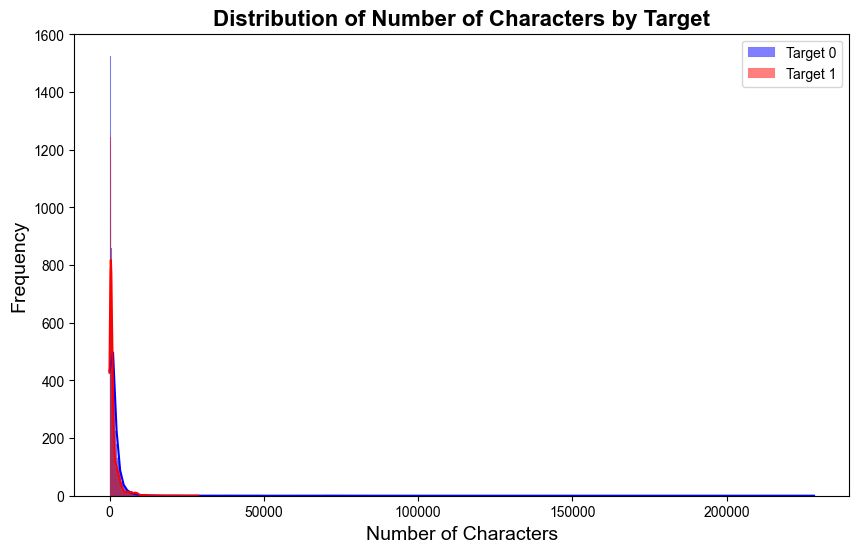

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


In [21]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [22]:
df['transformed_text'] = df['text'].apply(transform_text)
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,text,label,label_text,subject,message,target,num_characters,num_words,num_sentence,transformed_text
0,any software just for 15 $ - 99 $ understanding oem software lead me not into temptation ; i can find the way myself . # 3533 . the law disregards trifles .,1,spam,any software just for 15 $ - 99 $,understanding oem software lead me not into temptation ; i can find the way myself . # 3533 . the law disregards trifles .,1,156,33,3,softwar 15 99 understand oem softwar lead temptat find way 3533 law disregard trifl
1,"perspective on ferc regulatory action client conf call today , jun e 19 th , 2 : 00 pm edt perspective on ferc regulatory action client conference call today , tuesday , june 19 th 2 : 00 pm edt host : ray niles , power / natural gas analyst speaker : steve bergstrom , president & coo of dynegy steve bergstrom , president and chief operating officer of dynegy , will join us at 2 : 00 p . m . today for a conference call discussion of the recent ferc action imposing price controls in the west . the discussion will be followed by q & a . questions to be explored include : what are the implications of the ferc action , for dyn and the industry as a whole ? what is the earnings impact ? what are the risks of further re - regulation ? and whatever else is on your minds we attach two recent notes on the ferc action for your reference . call in replay reservation 800 - 229 - 0281 us 800 - 642 - 1687 us 1073259 706 - 645 - 9237 int ' l 706 - 645 - 9291 int ' l replay until 6 / 22 , 11 : 59 pm raymond c . niles power / natural gas research salomon smith barney ( 212 ) 816 - 2807 ray . niles @ ssmb . com s",0,ham,"perspective on ferc regulatory action client conf call today , jun e","19 th , 2 : 00 pm edt perspective on ferc regulatory action client conference call today , tuesday , june 19 th 2 : 00 pm edt host : ray niles , power / natural gas analyst speaker : steve bergstrom , president & coo of dynegy steve bergstrom , president and chief operating officer of dynegy , will join us at 2 : 00 p . m . today for a conference call discussion of the recent ferc action imposing price controls in the west . the discussion will be followed by q & a . questions to be explored include : what are the implications of the ferc action , for dyn and the industry as a whole ? what is the earnings impact ? what are the risks of further re - regulation ? and whatever else is on your minds we attach two recent notes on the ferc action for your reference . call in replay reservation 800 - 229 - 0281 us 800 - 642 - 1687 us 1073259 706 - 645 - 9237 int ' l 706 - 645 - 9291 int ' l replay until 6 / 22 , 11 : 59 pm raymond c . niles power / natural gas research salomon smith barney ( 212 ) 816 - 2807 ray . niles @ ssmb . com s",0,1112,239,12,perspect ferc regulatori action client conf call today jun e 19 th 2 00 pm edt perspect ferc regulatori action client confer call today tuesday june 19 th 2 00 pm edt host ray nile power natur ga analyst speaker steve bergstrom presid coo dynegi steve bergstrom presid chief oper offic dynegi join us 2 00 p today confer call discuss recent ferc action impos price control west discuss follow q question explor includ implic ferc action dyn industri whole earn impact risk regul whatev els mind attach two recent note ferc action refer call replay reserv 800 229 0281 us 800 642 1687 us 1073259 706 645 9237 int l 706 645 9291 int l replay 6 22 11 59 pm raymond c nile power natur ga research salomon smith barney 212 816 2807 ray nile ssmb com
2,wanted to try ci 4 lis but thought it was way too expensive for you ? viagra at $ 1 . 12 per dose ready to boost your sex life ? positive ? time to do it right now . order viagra at incredibly low prices $ 1 . 12 per dose . unbelivable remove,1,spam,wanted to try ci 4 lis but thought it was way too expensive for you ?,viagra at $ 1 . 12 per dose ready to boost your sex life ? positive ? time to do it right now . order viagra at incredibly low prices $ 1 . 12 per dose . unbeli

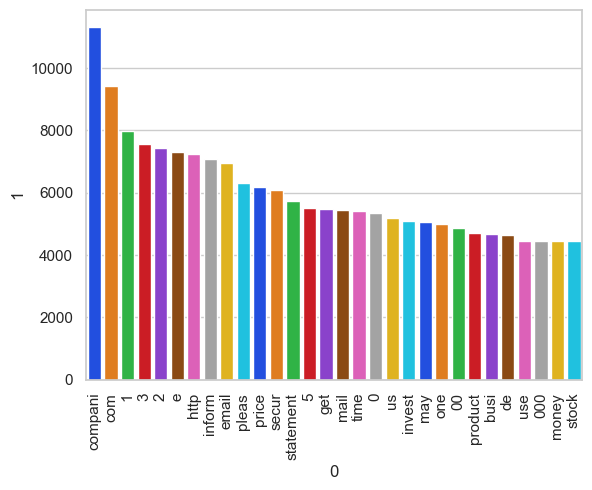

In [23]:
from collections import Counter
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

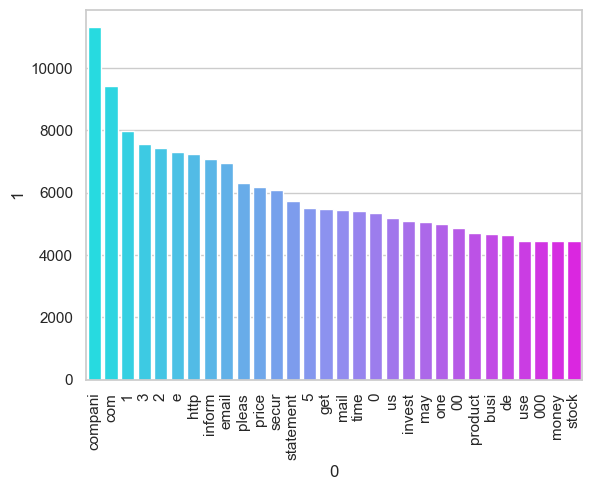

In [24]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [26]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [28]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


In [30]:
import pickle
results = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f1 = train_classifier(clf, X_train, y_train, X_test, y_test)
    results.append({
        'Classifier': name,
        'Accuracy': current_accuracy,
        'Precision': current_precision,
        'Recall': current_recall,
        'F1': current_f1
    })
    
    # Save the trained model
    with open(f'{name}_model.pkl', 'wb') as f:
        pickle.dump(clf, f)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('classification_metrics.csv', index=False)

# Display the results DataFrame
print(results_df)


   Classifier  Accuracy  Precision    Recall        F1
0         SVC  0.986306   0.981248  0.990175  0.985691
1         KNN  0.685387   0.602550  0.997453  0.751268
2          NB  0.977812   0.973951  0.979622  0.976778
3          DT  0.856648   0.773569  0.988355  0.867870
4          LR  0.980933   0.972421  0.987991  0.980144
5          RF  0.981453   0.976199  0.985080  0.980619
6    Adaboost  0.952851   0.939943  0.962518  0.951097
7         Bgc  0.969665   0.967988  0.968341  0.968164
8         ETC  0.987173   0.986536  0.986536  0.986536
9        GBDT  0.930664   0.883410  0.984352  0.931153
10        xgb  0.974519   0.956156  0.991994  0.973745
